# DsDA Controller

Creates multiple dataset and runs them through the DsDA method

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt
import glob

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

In [6]:
# set_log_level_warning()
# set_log_level_info()
set_log_level_debug()

Load densities trained on 19 beer data (see [loader_kde](loader_kde.ipynb)).

In [7]:
base_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\'
base_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\'

In [9]:
ps = load_obj(os.path.join(base_dir, 'Trained Models\\peak_sampler_19_beers_fragmentation.p'))

Load chromatogram data exported from R

In [10]:
cc = ChromatogramCreator(os.path.join(base_dir, 'Trained Models\\chromatogram_19_beers.csv.gz'))

INFO:ChromatogramCreator:Loading 0 chromatograms
INFO:ChromatogramCreator:Loading 5000 chromatograms
INFO:ChromatogramCreator:Loading 10000 chromatograms
INFO:ChromatogramCreator:Loading 15000 chromatograms
INFO:ChromatogramCreator:Loading 20000 chromatograms
INFO:ChromatogramCreator:Loading 25000 chromatograms
INFO:ChromatogramCreator:Loading 30000 chromatograms
INFO:ChromatogramCreator:Loading 35000 chromatograms
INFO:ChromatogramCreator:Loading 40000 chromatograms
INFO:ChromatogramCreator:Loading 45000 chromatograms
INFO:ChromatogramCreator:Loading 50000 chromatograms
INFO:ChromatogramCreator:Loading 55000 chromatograms
INFO:ChromatogramCreator:Loading 60000 chromatograms
INFO:ChromatogramCreator:Loading 65000 chromatograms
INFO:ChromatogramCreator:Loading 70000 chromatograms
INFO:ChromatogramCreator:Loading 75000 chromatograms
INFO:ChromatogramCreator:Loading 80000 chromatograms
INFO:ChromatogramCreator:Loading 85000 chromatograms
INFO:ChromatogramCreator:Loading 90000 chromatogram

## Generate some chemicals

In [11]:
hmdb = load_obj(os.path.join(base_dir, 'Trained Models\\hmdb_compounds.p'))

In [12]:
chemicals = ChemicalCreator(ps)

In [13]:
min_ms1_intensity = 2E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1000)]
n_ms1_peaks = 1000
alpha = 0.1
# alpha = math.inf
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, n_ms1_peaks, ms_levels=2, chemical_type='Known',
               formula_list=None, compound_list=hmdb, alpha=math.inf, fixed_mz=False)

DEBUG:ChemicalCreator:1000 ms1 peaks to be created.
DEBUG:ChemicalCreator:i = 0
DEBUG:ChemicalCreator:i = 25
DEBUG:ChemicalCreator:i = 50
DEBUG:ChemicalCreator:i = 75
DEBUG:ChemicalCreator:i = 100
DEBUG:ChemicalCreator:i = 125
DEBUG:ChemicalCreator:i = 150
DEBUG:ChemicalCreator:i = 175
DEBUG:ChemicalCreator:i = 200
DEBUG:ChemicalCreator:i = 225
DEBUG:ChemicalCreator:i = 250
DEBUG:ChemicalCreator:i = 275
DEBUG:ChemicalCreator:i = 300
DEBUG:ChemicalCreator:i = 325
DEBUG:ChemicalCreator:i = 350
DEBUG:ChemicalCreator:i = 375
DEBUG:ChemicalCreator:i = 400
DEBUG:ChemicalCreator:i = 425
DEBUG:ChemicalCreator:i = 450
DEBUG:ChemicalCreator:i = 475
DEBUG:ChemicalCreator:i = 500
DEBUG:ChemicalCreator:i = 525
DEBUG:ChemicalCreator:i = 550
DEBUG:ChemicalCreator:i = 575
DEBUG:ChemicalCreator:i = 600
DEBUG:ChemicalCreator:i = 625
DEBUG:ChemicalCreator:i = 650
DEBUG:ChemicalCreator:i = 675
DEBUG:ChemicalCreator:i = 700
DEBUG:ChemicalCreator:i = 725
DEBUG:ChemicalCreator:i = 750
DEBUG:ChemicalCreator:i

## Multiple Datasets for DsDA

In [15]:
n_samples = [10]
classes = ["class1"]
intensity_noise_sd = [10000]
change_probabilities = None
change_differences_means = None
change_differences_sds = None
dropout_probabilities = None 
experimental_classes = None 
experimental_probabilitities = None 
experimental_sds = None

multiple_samples = MultiSampleCreator(dataset, n_samples, classes, intensity_noise_sd, 
                                      change_probabilities, change_differences_means, change_differences_sds, dropout_probabilities,
                                     experimental_classes, experimental_probabilitities, experimental_sds)

DEBUG:MultiSampleCreator:Classes, Statuses and Differences defined.
DEBUG:MultiSampleCreator:Dataset 1 of 10 created.
DEBUG:MultiSampleCreator:Dataset 2 of 10 created.
DEBUG:MultiSampleCreator:Dataset 3 of 10 created.
DEBUG:MultiSampleCreator:Dataset 4 of 10 created.
DEBUG:MultiSampleCreator:Dataset 5 of 10 created.
DEBUG:MultiSampleCreator:Dataset 6 of 10 created.
DEBUG:MultiSampleCreator:Dataset 7 of 10 created.
DEBUG:MultiSampleCreator:Dataset 8 of 10 created.
DEBUG:MultiSampleCreator:Dataset 9 of 10 created.
DEBUG:MultiSampleCreator:Dataset 10 of 10 created.


In [16]:
intensities_1 = np.array([chem.max_intensity for chem in multiple_samples.samples[0]])
intensities_2 = np.array([chem.max_intensity for chem in multiple_samples.samples[1]])
intensities_3 = np.array([chem.max_intensity for chem in multiple_samples.samples[2]])

In [17]:
intensities = np.stack([intensities_1, intensities_2, intensities_3], axis=1)
intensities = np.log(intensities)

In [18]:
print(multiple_samples.samples[0][0])
print(multiple_samples.samples[1][0])
print(multiple_samples.samples[2][0])

KnownChemical - 'C6H11NO2S2' rt=437.71 max_intensity=1060751.01
KnownChemical - 'C6H11NO2S2' rt=437.71 max_intensity=1073873.49
KnownChemical - 'C6H11NO2S2' rt=437.71 max_intensity=1092070.45


In [19]:
intensities.shape

(1000, 3)

{'whiskers': [<matplotlib.lines.Line2D at 0x25fbf6a7710>,
 'caps': [<matplotlib.lines.Line2D at 0x25fbf6a7da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25fbf6a75c0>,
 'medians': [<matplotlib.lines.Line2D at 0x25fbf6be470>,
 'fliers': [<matplotlib.lines.Line2D at 0x25fbf6be7b8>,
 'means': []}

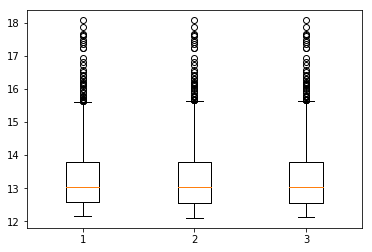

In [20]:
plt.boxplot(intensities)

## Set up a DsDA controller

We can run the dataset through a DsDA controller

In [21]:
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window (Dalton) around a selected precursor ion
rt_tol = 15                     # the rt window (second) around a selected precursor ion to prevent it from fragmented multiple times
min_ms1_intensity = 2.5E5       # the minimum ms1 peak intensity to be fragmented

In [22]:
dsda_dir = 'C:\\Users\\joewa\\University of Glasgow\\Vinny Davies - CLDS Metabolomics Project\\DsDA\\'
dsda_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\DsDA\\'
mzml_dir = os.path.join(dsda_dir, 'DsDA_Test\\Data')
schedule_file = os.path.join(dsda_dir, 'DsDA_Test\\settings\\Schedule.csv')

In [24]:
mass_spec = DsDAMassSpec(POSITIVE, dataset, density=ps.density_estimator)
controller = DsDAController(mass_spec, 1, 0.5, 15, 2E5)
#controller = DsDAController(mass_spec, 0.5)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(schedule_file,False)
# now works as a TopN Controller but at set times
# possible rounding issue with scans

In [28]:
print(controller.scans[1][0],controller.scans[1][0].isolation_windows)
print(controller.scans[1][1],controller.scans[1][1].isolation_windows)
print(controller.scans[2][0],controller.scans[2][0].isolation_windows)
print(controller.scans[2][1],controller.scans[2][1].isolation_windows)
print(controller.scans[2][2],controller.scans[2][2].isolation_windows)
print(controller.scans[2][3],controller.scans[2][3].isolation_windows)
print(controller.scans[1][2],controller.scans[1][2].isolation_windows)
print(controller.scans[2][4],controller.scans[2][4].isolation_windows)
print(controller.scans[2][5],controller.scans[2][5].isolation_windows)
print(controller.scans[2][6],controller.scans[2][6].isolation_windows)
print(controller.scans[2][7],controller.scans[2][7].isolation_windows)


Scan 0 num_peaks=0 rt=1.22 ms_level=1 [[(0, 1000.0)]]
Scan 1 num_peaks=0 rt=1.42 ms_level=1 [[(0, 1000.0)]]
Scan 2 num_peaks=0 rt=1.47 ms_level=2 [[(227.6594, 228.6594)]]
Scan 3 num_peaks=0 rt=1.53 ms_level=2 [[(227.6594, 228.6594)]]
Scan 4 num_peaks=0 rt=1.58 ms_level=2 [[(106.4716, 107.4716)]]
Scan 5 num_peaks=0 rt=1.64 ms_level=2 [[(106.4716, 107.4716)]]
Scan 6 num_peaks=0 rt=1.84 ms_level=1 [[(0, 1000.0)]]
Scan 7 num_peaks=0 rt=1.89 ms_level=2 [[(322.7691, 323.7691)]]
Scan 8 num_peaks=0 rt=1.95 ms_level=2 [[(322.7691, 323.7691)]]
Scan 9 num_peaks=0 rt=2.01 ms_level=2 [[(318.4, 319.4)]]
Scan 10 num_peaks=0 rt=2.06 ms_level=2 [[(318.4, 319.4)]]


In [ ]:
#controller.write_mzML('my_analysis', os.path.join(base_dir, 'DsDA\DsDA_Test\Data\\output.mzML'))

# Run DsDA on multiple samples

In [58]:
schedule_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\DsDA\\DsDA_Test\\settings'
data_dir = 'C:\\Users\\Vinny\\OneDrive - University of Glasgow\\CLDS Metabolomics Project\\DsDA\\DsDA_Test\\Data'

In [87]:
def get_schedule(n):
    while True:
        files = sorted(glob.glob(schedule_dir + '\\*.csv'))
        if len(files) == n:
            last_file = files[-1]
            try:
                schedule = pd.read_csv(last_file)
                if schedule.shape[0] == 11951:
                    return last_file
            except:
                pass

In [88]:
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window (Dalton) around a selected precursor ion
rt_tol = 15                     # the rt window (second) around a selected precursor ion to prevent it from fragmented multiple times
min_ms1_intensity = 2.5E5       # the minimum ms1 peak intensity to be fragmented
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1050)]

In [89]:
set_log_level_warning()
for n in range(len(multiple_samples.samples)):
    dataset = multiple_samples.samples[n]
    if n == 0:
        mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
        controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms1_intensity)
        controller.run(rt_range[0][0], rt_range[0][1])
        print("Run R File")
    else:
        last_schedule = get_schedule(n)
        print("Found new File", last_schedule)
        mass_spec = DsDAMassSpec(POSITIVE, dataset, density=ps.density_estimator)
        controller = DsDAController(mass_spec, 1, 0.5, 15, 2E5)
        controller.run(last_schedule)
    print("Processed ", n+1, " files")
    controller.write_mzML('my_analysis', data_dir + '\\%d.mzML' % n)

1080.0778770831291it [00:27, 38.92it/s]                                                                                


Run R File
Processed  1  files
Found new File C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\DsDA\DsDA_Test\settings\2019-04-23-16-38-47.csv


100%|██████████████████████████████████████████████████| 1013.7319511175206/1013.7319511175206 [00:23<00:00, 43.89it/s]


Processed  2  files
Found new File C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\DsDA\DsDA_Test\settings\2019-04-23-16-44-18.csv


100%|██████████████████████████████████████████████████| 1013.7319511175206/1013.7319511175206 [00:26<00:00, 38.76it/s]


Processed  3  files
Found new File C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\DsDA\DsDA_Test\settings\2019-04-23-16-46-55.csv


100%|██████████████████████████████████████████████████| 1013.7319511175206/1013.7319511175206 [00:23<00:00, 43.52it/s]


Processed  4  files


KeyboardInterrupt: 

In [66]:
#controller.schedule['targetTime']
print(last_schedule)

C:\Users\Vinny\OneDrive - University of Glasgow\CLDS Metabolomics Project\DsDA\DsDA_Test\settings\2019-04-23-16-01-55.csv


In [80]:
controller.schedule["targetTime"].values[-1]

1014.94995117188